# 0.0 Customer Segmentation & Clusters Analysis 

## 0.1 Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import HTML

from sklearn import cluster       as c
from sklearn import metrics       as m
from sklearn import preprocessing as pp

## 0.2 Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [3]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 0.3 Loading Data

In [4]:
url = "/home/mvrcosp/repos/CustomerSegmentation/data/raw/marketing_campaign.csv"

dfraw = pd.read_csv(url, sep='\t')

## 0.4 Data Dictionary

## Attributes

### People

**ID:** Customer's unique identifier

**Year_Birth:** Customer's birth year

**Education:** Customer's education level

**Marital_Status:** Customer's marital status

**Income:** Customer's yearly household income

**Kidhome:** Number of children in customer's household

**Teenhome:** Number of teenagers in customer's household

**Dt_Customer:** Date of customer's enrollment with the company

**Recency:** Number of days since customer's last purchase

**Complain:** 1 if the customer complained in the last 2 years, 0 otherwise

### Products

**MntWines:** Amount spent on wine in last 2 years

**MntFruits:** Amount spent on fruits in last 2 years

**MntMeatProducts:** Amount spent on meat in last 2 years

**MntFishProducts:** Amount spent on fish in last 2 years

**MntSweetProducts:** Amount spent on sweets in last 2 years

**MntGoldProds:** Amount spent on gold in last 2 years

### Promotion

**NumDealsPurchases:** Number of purchases made with a discount

**AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise

**AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

**AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

**AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise

**AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise

**Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place

**NumWebPurchases:** Number of purchases made through the company’s website

**NumCatalogPurchases:** Number of purchases made using a catalogue

**NumStorePurchases:** Number of purchases made directly in stores

**NumWebVisitsMonth:** Number of visits to company’s website in the last month

# 1.0 First Glimpse at Data

In [5]:
dfraw.shape

(2240, 29)

In [6]:
dfraw.sample(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
870,10140,1983,PhD,Together,70123.0,0,0,28-09-2013,27,1308,0,396,23,0,0,1,5,7,4,3,0,1,0,0,1,0,3,11,0
1717,7629,1977,Graduation,Married,22108.0,1,1,08-05-2014,46,5,3,9,6,2,6,2,2,0,3,7,0,0,0,0,0,0,3,11,0
894,8800,1943,PhD,Divorced,48948.0,0,0,01-02-2013,53,437,8,206,160,49,42,2,7,10,5,6,1,0,0,0,0,0,3,11,1
186,5823,1970,PhD,Single,32303.0,0,1,08-03-2014,63,35,0,2,0,0,2,2,1,0,4,5,0,0,0,0,0,0,3,11,0
1665,6437,1985,2n Cycle,Single,41473.0,1,0,19-06-2013,80,21,8,20,15,3,9,1,2,0,3,7,0,0,0,0,0,0,3,11,0
526,4322,1958,PhD,Together,77863.0,0,0,27-11-2013,20,881,38,319,16,25,12,1,4,5,10,2,0,0,0,0,0,0,3,11,0
1901,10779,1983,Graduation,Single,22148.0,0,0,13-04-2014,16,15,5,14,0,4,11,1,1,0,3,7,0,0,0,0,0,0,3,11,0
1874,4796,1952,Graduation,Divorced,49638.0,0,1,19-04-2014,71,18,10,3,3,5,0,1,1,0,3,2,0,0,0,0,0,0,3,11,0
2113,3969,1974,Master,Together,43018.0,0,1,01-11-2013,46,35,4,17,7,6,64,1,2,2,2,5,0,0,0,0,0,0,3,11,0
986,8164,1978,PhD,Married,82170.0,0,0,25-11-2013,13,1023,93,651,49,55,37,1,5,6,7,2,0,0,0,0,0,0,3,11,0


In [7]:
dfraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
dfraw.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

# 2.0 First Round of Data Cleaning

In [9]:
df1 = dfraw.copy()

## 2.1 Rename columns

In [10]:
df1.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [11]:
new_cols = ['ID', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'CustomerDate', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'AcceptedCmpFnl']

df1.columns = new_cols

## 2.2 Dates to Datetime

In [12]:
df1["YearBirth"] = pd.to_datetime(df1["YearBirth"], format="%Y")
df1['CustomerDate'] = pd.to_datetime(df1['CustomerDate'], format="%d-%m-%Y")

In [13]:
df1[["CustomerDate", "YearBirth"]].head()

,CustomerDate,YearBirth
0,2012-09-04,1957-01-01
1,2014-03-08,1954-01-01
2,2013-08-21,1965-01-01
3,2014-02-10,1984-01-01
4,2014-01-19,1981-01-01


## 2.3 Drop Columns / NA

In [14]:
df1 = df1.drop(labels=["Z_CostContact", "Z_Revenue"], axis=1)

In [15]:
df1 = df1.dropna()

## 2.4 Change dtypes

In [16]:
df1["ID"] = df1["ID"].astype(str)
df1["Education"] = df1["Education"].astype("category")
df1["MaritalStatus"] = df1["MaritalStatus"].astype("category")

In [17]:
df1.dtypes

ID                             object
YearBirth              datetime64[ns]
Education                    category
MaritalStatus                category
Income                        float64
Kidhome                         int64
Teenhome                        int64
CustomerDate           datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
AcceptedCmpF

# 3.0 Data Description & Exploring

In [18]:
df2 = df1.copy()

In [19]:
dfcat = df2.select_dtypes(include=["object", "category"])
dfnum = df2.select_dtypes(include=["int64", "float64", "datetime64[ns]"])

## 3.1 Numerical Attributes Describe()

In [20]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.0,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.0,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.0,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.0,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.0,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.0,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.0,12.0,50.00,259.0
MntSweetProducts,2216.0,27.028881,41.072046,0.0,1.0,8.0,33.00,262.0
MntGoldProds,2216.0,43.965253,51.815414,0.0,9.0,24.5,56.00,321.0


In [21]:
df2.Income.nlargest(2)

2233    666666.0
617     162397.0
Name: Income, dtype: float64

## 3.2 Numerical Attributes Skew & kurtosis

In [22]:
dfnum.skew()

/tmp/ipykernel_44570/1392430659.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfnum.skew()


Income                  6.763487
Kidhome                 0.635610
Teenhome                0.407553
Recency                 0.001648
MntWines                1.170720
MntFruits               2.101658
MntMeatProducts         2.025577
MntFishProducts         1.916369
MntSweetProducts        2.103328
MntGoldProds            1.839231
NumDealsPurchases       2.415272
NumWebPurchases         1.197037
NumCatalogPurchases     1.881075
NumStorePurchases       0.701826
NumWebVisitsMonth       0.218043
AcceptedCmp3            3.269397
AcceptedCmp4            3.256758
AcceptedCmp5            3.282143
AcceptedCmp1            3.562482
AcceptedCmp2            8.424753
Complain               10.132737
AcceptedCmpFnl          1.958748
dtype: float64

In [23]:
dfnum.kurtosis()

/tmp/ipykernel_44570/1159052801.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfnum.kurtosis()


Income                 159.636700
Kidhome                 -0.791164
Teenhome                -0.989619
Recency                 -1.199777
MntWines                 0.582741
MntFruits                4.054082
MntMeatProducts          5.055477
MntFishProducts          3.076476
MntSweetProducts         4.106141
MntGoldProds             3.156342
NumDealsPurchases        8.974490
NumWebPurchases          4.072137
NumCatalogPurchases      8.067126
NumStorePurchases       -0.626462
NumWebVisitsMonth        1.852577
AcceptedCmp3             8.696805
AcceptedCmp4             8.614248
AcceptedCmp5             8.780388
AcceptedCmp1            10.700936
AcceptedCmp2            69.038772
Complain               100.763293
AcceptedCmpFnl           1.838352
dtype: float64

## 3.3 Numerical Attributes Histogram

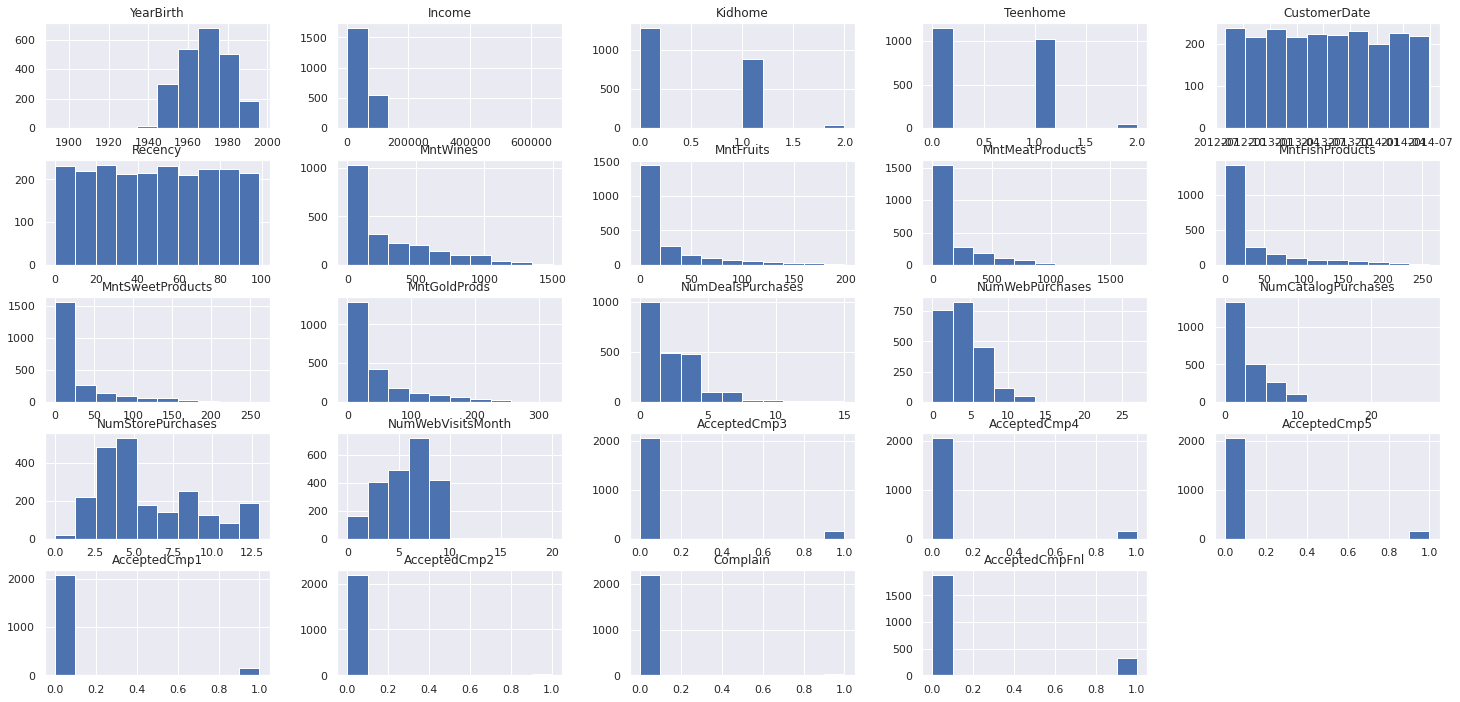

In [24]:
dfnum.hist()
plt.show()

## 3.5 Categorical Attributes Countplot

<AxesSubplot:xlabel='Education', ylabel='count'>

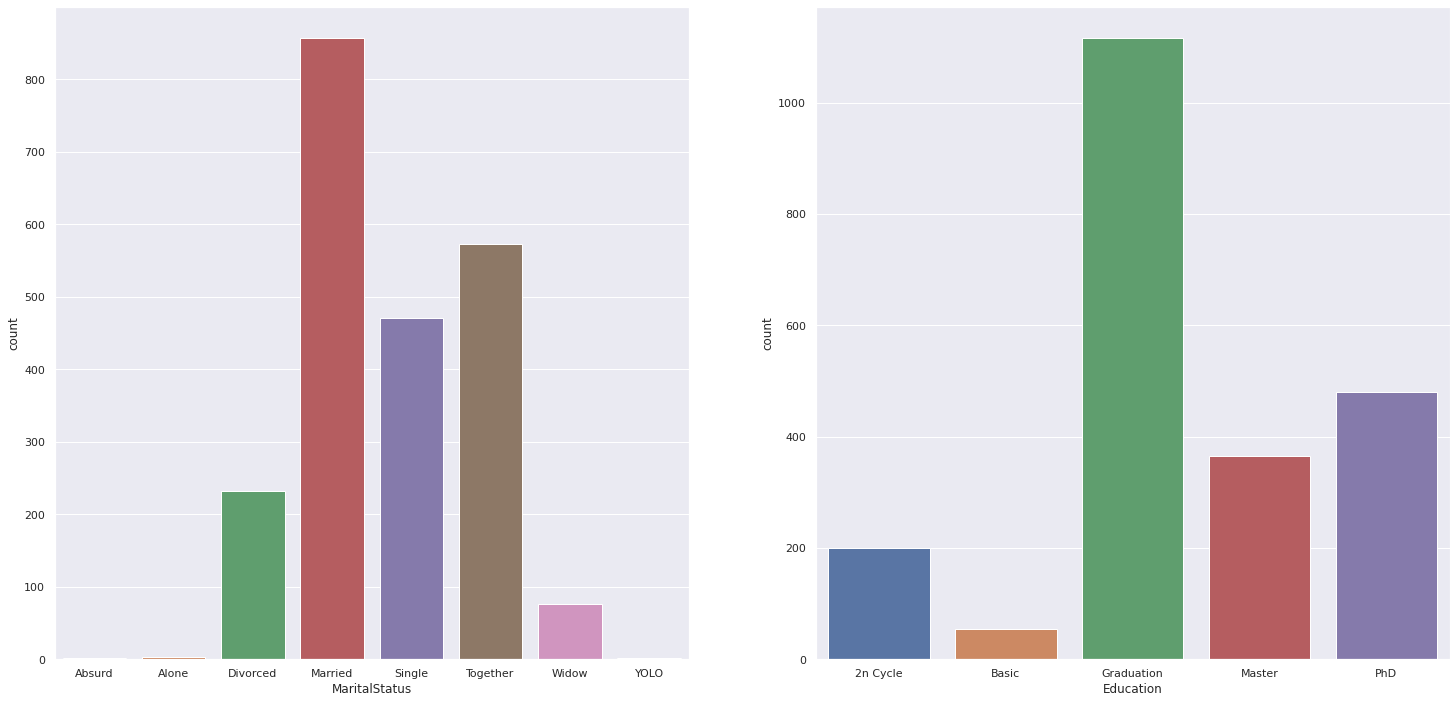

In [25]:
plt.subplot(1, 2, 1)
sns.countplot(x="MaritalStatus", data=dfcat)

plt.subplot(1, 2, 2)
sns.countplot(x="Education", data=dfcat)

In [26]:
dfcat["MaritalStatus"].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: MaritalStatus, dtype: int64

## 2.6 Year of Birth Exploration

In [27]:
dfnum["YearBirth"].value_counts()

1976-01-01    89
1971-01-01    86
1975-01-01    83
1972-01-01    78
1978-01-01    76
1970-01-01    75
1965-01-01    74
1973-01-01    72
1969-01-01    70
1974-01-01    69
1956-01-01    55
1979-01-01    53
1958-01-01    52
1977-01-01    52
1952-01-01    52
1968-01-01    51
1966-01-01    50
1959-01-01    50
1954-01-01    49
1960-01-01    49
1955-01-01    48
1982-01-01    44
1963-01-01    44
1962-01-01    44
1967-01-01    44
1951-01-01    42
1983-01-01    41
1986-01-01    41
1957-01-01    41
1964-01-01    41
1980-01-01    39
1981-01-01    38
1984-01-01    38
1961-01-01    35
1953-01-01    35
1985-01-01    32
1949-01-01    30
1989-01-01    29
1988-01-01    29
1950-01-01    29
1987-01-01    27
1948-01-01    21
1990-01-01    18
1946-01-01    16
1947-01-01    16
1991-01-01    15
1992-01-01    13
1945-01-01     8
1944-01-01     7
1943-01-01     6
1995-01-01     5
1993-01-01     5
1994-01-01     3
1996-01-01     2
1899-01-01     1
1941-01-01     1
1893-01-01     1
1900-01-01     1
1940-01-01    

# 4.0 Second Round of Data Cleaning

We found some unusual values in some of the attributes. We'll be performing another round of data cleaning where we will:

* Categorize marital status **"Alone"**, **"YOLO"** and **"Absurd"** as **"Single"**
* Remove an outlier from the **"Income"** collumn
* Filter data by year of birth > 1940

In [28]:
df3 = df2.copy()

In [29]:
df3["MaritalStatus"] = df3["MaritalStatus"].apply(lambda x: "Single" if (x == "Alone") | (x == "Absurd") | (x == "YOLO") else x) 

In [30]:
df3.MaritalStatus.value_counts()

Married     857
Together    573
Single      478
Divorced    232
Widow        76
Name: MaritalStatus, dtype: int64

In [31]:
df3 =  df3.loc[df3["Income"] <= 200000, :]

In [32]:
df3.Income.max()

162397.0

In [35]:
df3 = df3.loc[df3["YearBirth"] > "01-01-1940", :]

In [36]:
df3.shape

(2211, 27)

# 5.0 Feature Engineering

In [37]:
df4 = df3.copy()

In [38]:
df4.head()

,ID,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,CustomerDate,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmpFnl
0,5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954-01-01,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965-01-01,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984-01-01,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


## 5.1 Brainstorming for new features

Here I'll just brainstorm for some new features that I can create based on my original ones. These features will not be necessarily used as input to the clustering algorithm, but might bring some interesting insights when exploring the data. I've come up with:

* Age when enrolled with the company;
* Total number of children in the household (Kidhome + Teenhome)
* Are there children in the household? (0 = False, 1 = True)
* Total Amount spent;
* Percentage of income spent;
* Total purchases made (web + store + catalog + deals);
* Total enrolled campaigns.


In [39]:
df4.columns

Index(['ID', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'CustomerDate', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'AcceptedCmpFnl'],
      dtype='object')

## 5.2 Creating new features

In [40]:
# Age when enrolled with the company
df4["AgeEnrolled"] = df4["CustomerDate"].dt.year - df4["YearBirth"].dt.year

# Number of children in the household
df4["ChildrenHome"] = df4["Kidhome"] + df4["Teenhome"]

# Children in household? 
df4["HaveChildren"] = df4["ChildrenHome"].apply(lambda x: 0 if x == 0 else 1)

# Total Amount Spent
df4["TotalMnt"] = df4['MntWines'] + df4['MntFruits'] +df4['MntMeatProducts'] + df4['MntFishProducts'] + df4['MntSweetProducts'] + df4['MntGoldProds']

# % of income spent
df4["PctIncomeSpnt"] = df4["TotalMnt"] / df4["Income"]

# Total Purchases made
df4["TotalPurchases"] = df4['NumCatalogPurchases'] + df4['NumStorePurchases'] + df4['NumWebPurchases'] + df4["NumDealsPurchases"]

# Total Enrolled Campaigns
df4["TotalCmp"] = df4['AcceptedCmp1'] + df4['AcceptedCmp2'] + df4['AcceptedCmp3'] + df4['AcceptedCmp4'] + df4['AcceptedCmp5'] + df4['AcceptedCmpFnl']


In [41]:
df4.head()

,ID,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,CustomerDate,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmpFnl,AgeEnrolled,ChildrenHome,HaveChildren,TotalMnt,PctIncomeSpnt,TotalPurchases,TotalCmp
0,5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,55,0,0,1617,0.027813,25,1
1,2174,1954-01-01,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,2,1,27,0.000583,6,0
2,4141,1965-01-01,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,48,0,0,776,0.010836,21,0
3,6182,1984-01-01,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,1,1,53,0.001989,8,0
4,5324,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,1,1,422,0.007239,19,0


## 5.3 Feature Selection 

Since we created new collumns based on the original dataset attributes, we'll be droping some of these original columns. The idea is to select only attributes that are business related (such as purchases, amountspent, deals, etc) 

In [42]:
X = df4[["Recency", "TotalMnt", "TotalPurchases", "TotalCmp", "NumWebVisitsMonth"]]

In [43]:
X.TotalCmp.value_counts()

0    1607
1     368
2     139
3      51
4      36
5      10
Name: TotalCmp, dtype: int64

In [44]:
X.head()

,Recency,TotalMnt,TotalPurchases,TotalCmp,NumWebVisitsMonth
0,58,1617,25,1,7
1,38,27,6,0,5
2,26,776,21,0,4
3,26,53,8,0,6
4,94,422,19,0,5


In [50]:
mm = pp.MinMaxScaler()

X["Recency"] = mm.fit_transform(X[["Recency"]])
X["NumWebVisitsMonth"] = mm.fit_transform(X[["NumWebVisitsMonth"]])
#X["Complain"] = ss.fit_transform(X[["Complain"]])
X["TotalMnt"] = mm.fit_transform(X[["TotalMnt"]])
X["TotalPurchases"] = mm.fit_transform(X[["TotalPurchases"]])
X["TotalCmp"] = mm.fit_transform(X[["TotalCmp"]])

/tmp/ipykernel_44570/339910651.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Recency"] = mm.fit_transform(X[["Recency"]])
/tmp/ipykernel_44570/339910651.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["NumWebVisitsMonth"] = mm.fit_transform(X[["NumWebVisitsMonth"]])
/tmp/ipykernel_44570/339910651.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [51]:
X.head()

,Recency,TotalMnt,TotalPurchases,TotalCmp,NumWebVisitsMonth
0,0.585859,0.639683,0.568182,0.2,0.35
1,0.383838,0.008730,0.136364,0.0,0.25
2,0.262626,0.305952,0.477273,0.0,0.20
3,0.262626,0.019048,0.181818,0.0,0.30
4,0.949495,0.165476,0.431818,0.0,0.25


<AxesSubplot:>

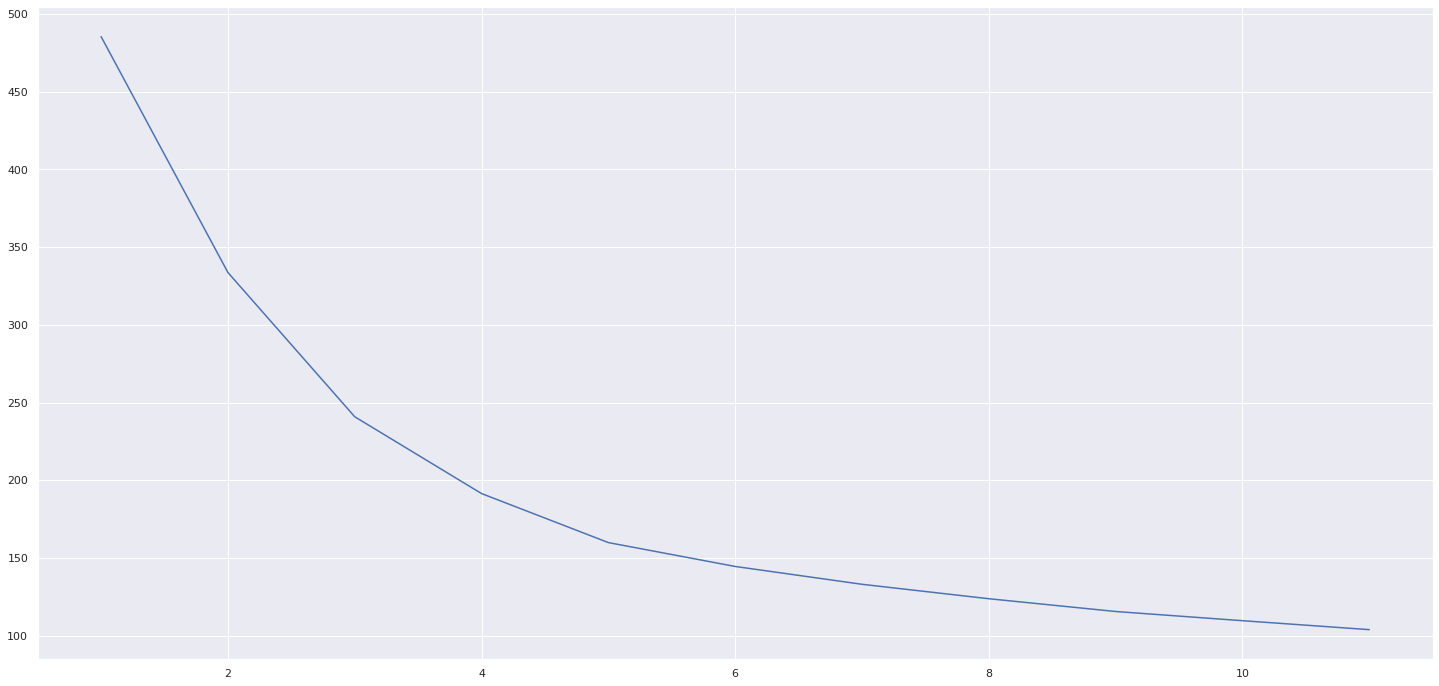

In [52]:
inertia = []
clusters = list(range(1, 12))

for i in clusters:
  kmeans = c.KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300, random_state=42)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

sns.lineplot(x=arange(1, 12), y=inertia, markers=True)

In [ ]:
clusters